# Balanced Random Forest Classifier

In [1]:
# Initial imports.

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot 
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Loading data

file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Database/database_erd.csv")
df_psp = pd.read_csv(file_path)
df_psp.head()

,Unnamed: 0,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,66154,25312,118,0,68.0,22.73,0,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,1,114252,59342,81,0,77.0,27.42,0,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,2,119783,50777,118,0,25.0,31.95,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,3,79267,46918,118,0,81.0,22.64,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,33181,74489,83,0,67.0,27.56,0,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4


In [3]:
# Create our features

X = df_psp.drop('hospital_death', axis=1)


X.head()


,Unnamed: 0,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,66154,25312,118,68.0,22.73,0,2,1,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,1,114252,59342,81,77.0,27.42,0,2,0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,2,119783,50777,118,25.0,31.95,0,2,0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,3,79267,46918,118,81.0,22.64,1,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,33181,74489,83,67.0,27.56,0,2,1,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4


In [4]:
X.describe()

,Unnamed: 0,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,...,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000
mean,46589.550046,65636.034470,65562.871398,106.544746,62.377889,29.307391,0.179783,2.035255,0.544196,169.827046,...,0.000936,0.016602,0.229423,0.013917,0.027752,0.007475,0.004102,0.021709,4.322178,2.529521
std,26154.096361,37764.295479,37789.958119,63.229680,16.781003,8.293883,0.384010,1.068474,0.498185,10.746944,...,0.030581,0.127775,0.420465,0.117149,0.164263,0.086134,0.063918,0.145732,3.794873,2.767511
min,0.000000,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,0.000000,0.000000,137.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24131.500000,32859.000000,32853.000000,49.000000,52.000000,23.738117,0.000000,2.000000,0.000000,162.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46028.000000,65823.000000,65500.000000,112.000000,65.000000,27.800688,0.000000,2.000000,1.000000,170.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
75%,69701.500000,98306.000000,98286.000000,166.000000,75.000000,33.077351,0.000000,2.000000,1.000000,177.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000
max,91712.000000,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,6.000000,2.000000,195.590000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,9.000000


In [5]:
# Create our target

y = df_psp['hospital_death']
y.value_counts()

0    66797
1     5846
Name: hospital_death, dtype: int64

## Split Data into Training and Testing

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50098, 1: 4384})
Counter({0: 16699, 1: 1462})


### Balanced Random Forest Classifier with All Columns

In [8]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Instantiate
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [21]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy

0.7816354944458366

In [10]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,13004,3695
Actual Death,315,1147


In [11]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.78      0.78      0.87      0.78      0.61     16699
          1       0.24      0.78      0.78      0.36      0.78      0.61      1462

avg / total       0.92      0.78      0.78      0.83      0.78      0.61     18161



In [12]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

gcs_motor_apache: (0.03455870139122171)
d1_sysbp_noninvasive_min: (0.03453436577844794)
gcs_verbal_apache: (0.034237686000589)
age: (0.0329775907868338)
gcs_eyes_apache: (0.03231949370113229)
ventilated_apache: (0.0317083469900637)
d1_spo2_min: (0.031509831797438145)
apache_3j_diagnosis: (0.03130650153480112)
d1_sysbp_min: (0.03119251713782293)
d1_heartrate_max: (0.0251335289236485)
apache_2_diagnosis: (0.022311999838061296)
d1_temp_min: (0.022130014532429014)
pre_icu_los_days: (0.021114803602692706)
d1_resprate_max: (0.019823907014576512)
d1_mbp_min: (0.019588773413210647)
heart_rate_apache: (0.018990752484860124)
map_apache: (0.018732015895883237)
d1_mbp_noninvasive_min: (0.018669102881206132)
temp_apache: (0.018423566875145434)
d1_diasbp_noninvasive_min: (0.01790972720194285)
h1_resprate_min: (0.016927218629293656)
bmi: (0.016523287360786683)
d1_heartrate_min: (0.016410965993281915)
d1_diasbp_min: (0.015991444698502826)
d1_temp_max: (0.015967534118191858)
h1_resprate_max: (0.0155932

In [28]:
import seaborn as sns

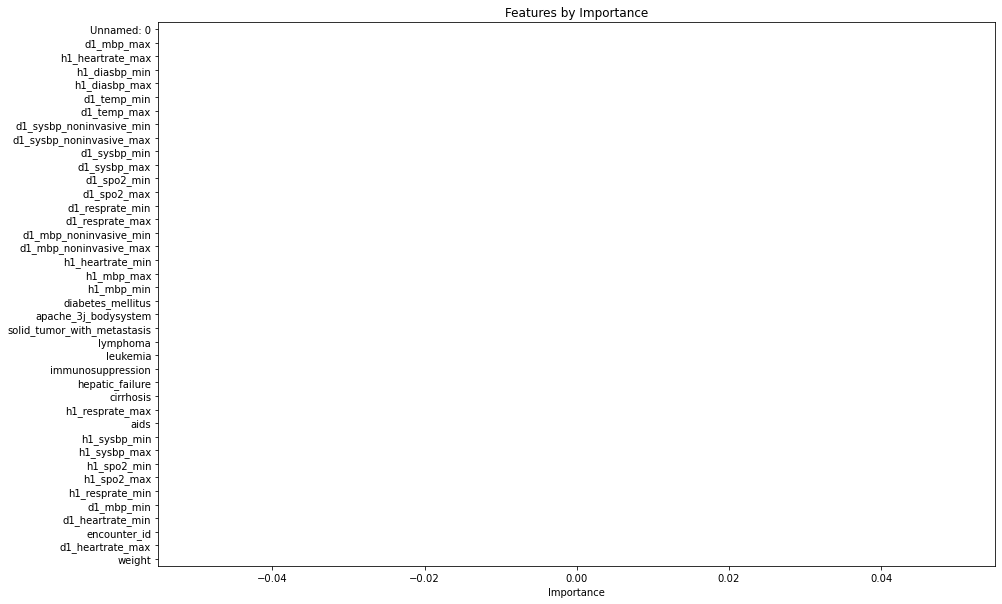

,Importance
Unnamed: 0,0.0
d1_mbp_max,0.0
h1_heartrate_max,0.0
h1_diasbp_min,0.0
h1_diasbp_max,0.0


In [34]:
#Show the importance of each feature in a graph

Features = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["Importance"], index=X_train.columns)



Features = Features.sort_values(by="Importance", ascending=False)[:40]

plt.figure(figsize=(15, 10))
sns.barplot(x="Importance", y=Importance.index, data=Importance)
plt.title("Features by Importance")
plt.show()

Importance.head()

### Easy Ensemble Classifier with All Columns

In [15]:
# Train the EasyEnsembleClassifier

from imblearn.ensemble import EasyEnsembleClassifier

# Instantiate

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# Fit
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [24]:
# Calculated the balanced accuracy score

y_pred = eec.predict(X_test)
EasyEnsemble_accuracy = balanced_accuracy_score(y_test, y_pred)

EasyEnsemble_accuracy


0.7776628252271305

In [17]:
# Display the confusion matrix
# Calculating the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])
cm_df

,Predicted Survival,Predicted Death
Actual Survival,13431,3268
Actual Death,364,1098


In [18]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.80      0.75      0.88      0.78      0.61     16699
          1       0.25      0.75      0.80      0.38      0.78      0.60      1462

avg / total       0.92      0.80      0.76      0.84      0.78      0.61     18161



In [25]:
# Report the accuracy scores of both models


Accuracy=[(RandomForest_accuracy*100),(EasyEnsemble_accuracy*100)]

  
df = {'Algorithm': ['Random Forest Classifier','Easy Ensemble Classifier'], \
      'Acuuracy_Score':Accuracy}


Accuracy_Scores = pd.DataFrame(data=df, columns=['Algorithm','Acuuracy_Score'], index=None)

Accuracy_Scores

,Algorithm,Acuuracy_Score
0,Random Forest Classifier,78.163549
1,Easy Ensemble Classifier,77.766283
